In [1]:
import pathlib
import logging
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Register the parent directory as a path to look for modules
notebook_dir = pathlib.Path().resolve()
parent_dir = notebook_dir.parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

from app.utils.dataset_builder.landsat_dataset_builder import LandsatDataBuilder
from app.models.file_processing.sources import FileSourceConfig
from app.utils.image_transformation.image_cube_operations import ImageCubeOperations, CubeRepresentation

logger = logging.getLogger("notebook")
logger.setLevel(logging.INFO)
ch = logging.StreamHandler(sys.stdout)
ch.setLevel(logging.INFO)

In [9]:
builder = LandsatDataBuilder(
    file_source_configuration=FileSourceConfig(
        source_path="../tests/test_payloads/phase_2/Set-4/Thermal/LC09_L2SP_147049_20251121_20251122_02_T1_ST_B10.TIF"
    )
)
vendable = builder.vend_dataset()

Using device: mps
Max Temp = 51.12948226928711
Min Temp = -124.1500015258789
Masked Array
(40644289, 1)
[25.44989967 28.40990448 29.30200768 33.48566437 37.39587784]
Anchors Set to [[-10.        ]
 [  5.        ]
 [ 29.30200768]
 [ 33.48566437]
 [ 37.39587784]]
17.3020076751709
[0 1]


Using device: mps


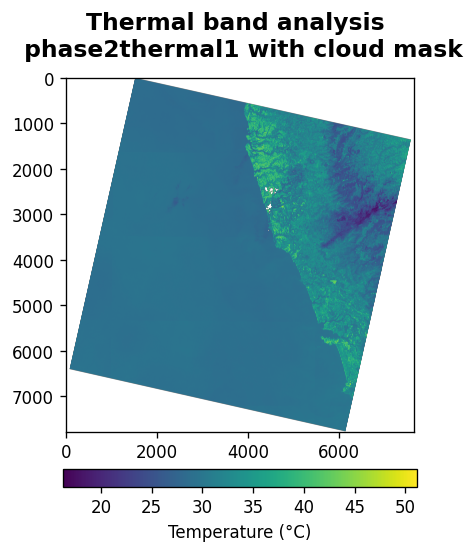

In [10]:
fig, axes = plt.subplots(
    1,
    1,
    figsize=(4 * 3, 4.5 * 1),
    constrained_layout=True,
    dpi=120,
)

image_cube_transformer = ImageCubeOperations()
transformed_bands = image_cube_transformer.convert_cube(
    cube = vendable.normalized_thermal_cube,
    from_format = CubeRepresentation.BSQ,
    to_format=CubeRepresentation.BIP,
    output_form="numpy"
)
transformed_masks = image_cube_transformer.convert_cube(
    cube = vendable.validity_cube,
    from_format = CubeRepresentation.BSQ,
    to_format=CubeRepresentation.BIP,
    output_form="numpy"
)
fig.suptitle(
            f"Thermal band analysis \n phase2thermal1 with cloud mask",
            fontsize=14,
            fontweight="bold",
        )
im = axes.imshow(
    np.ma.masked_where(transformed_masks==0, transformed_bands),  # Show the first channel/band in Celsius
    cmap="viridis"
)
cbar = fig.colorbar(
    im,
    ax=axes,
    orientation="horizontal",
    fraction=0.05,
    pad=0.02,
)

cbar.set_label("Temperature (°C)", fontsize=10)
